In [2]:

#new path
path = "asl_alphabets_smallDS"

In [3]:
path

'asl_alphabets_smallDS'

In [4]:
import tensorflow as tf 
from tensorflow import keras
import cv2 
import os   
import random
import matplotlib.pyplot as plt 
import numpy as np 
from keras.models import Sequential
from sklearn import preprocessing
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
from tensorflow.keras import regularizers
from keras.layers import Conv2D,Dropout,Flatten,Dense
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D 

In [5]:

#image_path
image_path = list(paths.list_images("asl_alphabets_smallDS/asl_dataset"))

#random
random.shuffle(image_path)
print(len(image_path))
     

5030


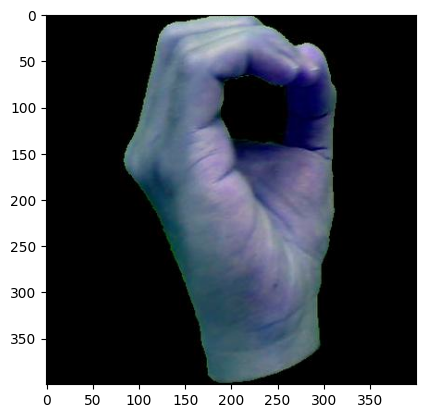

In [6]:
a = cv2.imread('asl_alphabets_smallDS/asl_dataset/0/hand5_0_dif_seg_5_cropped.jpeg')
plt.imshow(a)

In [7]:
#get labels
labels = [p.split(os.path.sep)[-2] for p in image_path]
print(labels)
#tranform labels to number
le = LabelEncoder()
labels = le.fit_transform(labels)

# One-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(len(labels))
print(labels[1])

['p', 'r', 't', 'x', 'o', 'e', '2', 'o', 'o', 'v', 'c', '9', 'f', '1', 'h', 'y', '4', 'b', '5', 'a', '4', 'n', '8', '5', 'b', '0', 'k', 'c', 'g', 'y', 'w', 'p', '9', '2', 'h', 'q', 'x', 'e', 'c', 'n', 'h', 'l', 'u', 'a', 'x', '7', '9', 'i', 'a', 'r', 'g', '6', 'a', 'i', 'i', '1', '9', 'q', 'v', '8', 'i', 't', '4', '3', 'b', 'm', 't', '2', 'z', 'u', 'a', 'j', '7', 'm', '4', '6', '3', 'k', 'g', 'b', 'j', 'e', 'e', '5', 'k', 'e', 'z', 'e', 'q', 'n', '8', 'c', 'b', 'w', '3', 'l', 'p', 'd', 's', 'b', '9', 'f', 'k', 'a', 'n', 'l', 'c', '2', 't', '7', 'y', 'e', 'w', 'e', 't', 'z', 'u', 'c', 'v', 'p', '2', 'e', 't', 'w', 't', 't', 'q', 'w', '6', 'b', '4', 'x', 'r', 'x', 'w', 'p', 'r', 't', '7', 'a', '3', 'r', 'q', 'w', '3', '7', 'n', 'o', 'z', 'q', 'f', '9', 'm', 'o', 'a', '4', 'r', 'f', 't', 'x', '7', 's', '8', '7', 'b', 'b', 'u', 'z', 'o', 'd', 'i', '4', '6', '9', '6', 's', '8', 'i', 'c', '5', '0', 'p', '5', 'j', 'i', '8', '8', '8', '5', 's', 'v', '6', 'i', 'd', 'q', 'm', 'n', 'h', 'v', '4',

In [8]:

#get all images
list_image = []
for (j, imagePath) in enumerate(image_path):
    image = load_img(imagePath, target_size=(64,64))
    image = img_to_array(image)
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    list_image.append(image)
list_image = np.vstack(list_image)
print(len(list_image))


5030


In [9]:

print(list_image.shape)

(5030, 64, 64, 3)


In [10]:


print(list_image[1])

[[[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 ...

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -12

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

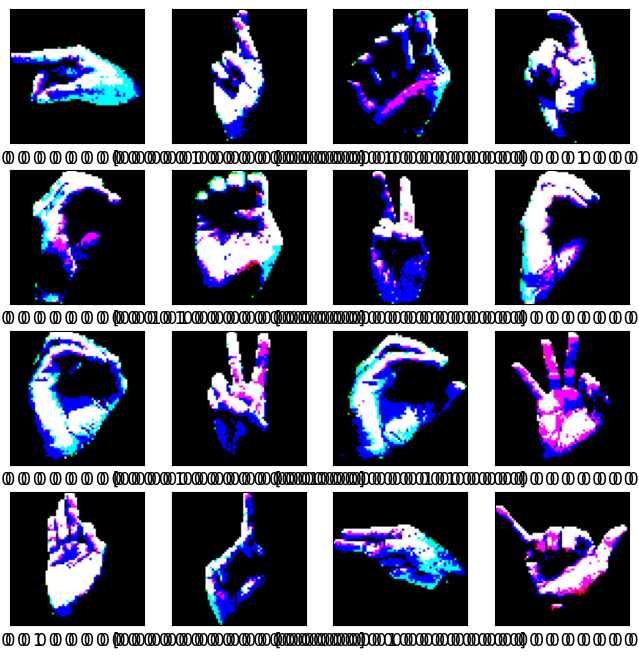

In [14]:

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(list_image[i], cmap='gray')
    plt.xlabel(f'{labels[i]}', fontsize = 12)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(list_image, labels, test_size=0.2, random_state=42)

In [16]:

print(len(X_train))
print(len(X_test))

4024
1006


In [17]:

#agument data
aug_train = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

aug_test= ImageDataGenerator(rescale=1./255)

In [18]:

model = Sequential()
#extract features
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(36, activation='softmax'))


In [19]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [20]:

# tf.keras.utils.plot_model(
#     model, to_file='model.png', show_shapes=False, show_dtype=False,
#     show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
#     layer_range=None, show_layer_activations=False
# )

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 256)         0

In [22]:

model.compile(loss ="categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [23]:

history = model.fit(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)//64,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=len(X_test)//64,
                        epochs=5)

Epoch 1/5
62/62 [==============================] - 45s 708ms/step - loss: 3.0833 - accuracy: 0.1154 - val_loss: 2.1094 - val_accuracy: 0.3187
Epoch 2/5
62/62 [==============================] - 43s 698ms/step - loss: 2.0205 - accuracy: 0.3220 - val_loss: 1.2414 - val_accuracy: 0.5479
Epoch 3/5
62/62 [==============================] - 44s 704ms/step - loss: 1.3459 - accuracy: 0.5197 - val_loss: 0.7050 - val_accuracy: 0.7771
Epoch 4/5
62/62 [==============================] - 44s 712ms/step - loss: 0.9298 - accuracy: 0.6654 - val_loss: 0.4254 - val_accuracy: 0.8427
Epoch 5/5
62/62 [==============================] - 44s 705ms/step - loss: 0.7179 - accuracy: 0.7399 - val_loss: 0.3756 - val_accuracy: 0.8573


In [27]:
model.save("asl_alphabets.h5")

C:\Users\Acer\anaconda3\envs\ipl\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
model.save("asl_alphabets.tflite")

INFO:tensorflow:Assets written to: asl_alphabets.tflite\assets


INFO:tensorflow:Assets written to: asl_alphabets.tflite\assets


In [24]:
y_predict = model.predict(X_test)

32/32 [==============================] - 2s 69ms/step


In [25]:
y_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)